# PARTE 1

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations

In [7]:
# Cargamos la segunda sheet para obtener los datos
df_all_1 = pd.read_excel('PROYECTO 1 - DATA SCIENCE.xlsx', sheet_name=1)

In [8]:
# Mostramos los datos
df_all_1

,Año natural/Mes,Dep,Departamento,Grupo artículos,Grupo artículos.1,Marca,Centro,Tienda,Formato de tienda,Región,Cadena,Venta,Vta Cto,Utilidad,Inventario cto,Vta pzas,Inventario pzas
0,ENE 2023,42,ACC. DEPORTIVOS,420001,RIFLE,MENDOZA,M001,La Marina Madero,LA MARINA,COLIMA,LA MARINA,NaN,NaN,NaN,15904.20,NaN,5
1,ENE 2023,42,ACC. DEPORTIVOS,420001,RIFLE,MENDOZA,M002,La Marina San Fernando,LA MARINA,COLIMA,LA MARINA,6800.86,3621.78,3179.08,20074.36,1.0,6
2,ENE 2023,42,ACC. DEPORTIVOS,420001,RIFLE,MENDOZA,M003,La Marina Zapotlán,LA MARINA,JALISCO,LA MARINA,5275.09,3349.15,1925.94,18719.35,1.0,6
3,ENE 2023,42,ACC. DEPORTIVOS,420001,RIFLE,MENDOZA,M004,La Marina La Piedad,LA MARINA,MICHOACAN,LA MARINA,NaN,NaN,NaN,19765.03,NaN,7
4,ENE 2023,42,ACC. DEPORTIVOS,420001,RIFLE,MENDOZA,M005,La Marina Guanajuato,LA MARINA,GUANAJUATO,LA MARINA,NaN,NaN,NaN,19539.14,NaN,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124747,DIC 2023,42,ACC. DEPORTIVOS,422621,MOCHILA ESCOLAR,CHARLY,B076,El Bodegón Sahuayo,EL BODEGON,MICHOACAN CIENEGA,EL BODEGON,NaN,NaN,NaN,0.00,NaN,0
124748,DIC 2023,42,ACC. DEPORTIVOS,422621,MOCHILA ESCOLAR,HEXAGON,B052,El Bodegón Autlán,EL BODEGON,JALISCO SUR,EL BODEGON,NaN,NaN,NaN,0.00,NaN,0
124749,DIC 2023,42,ACC. DEPORTIVOS,422621,MOCHILA ESCOLAR,HEXAGON,B057,El Bodegón Ayotlán,EL BODEGON,JALISCO ALTOS,EL BODEGON,NaN,NaN,NaN,0.00,NaN,0
124750,DIC 2023,42,ACC. DEPORTIVOS,422621,MOCHILA ESCOLAR,HEXAGON,B067,El Bodegón Uriangato,EL BODEGON,MICHOACAN CENTRO,EL BODEGON,NaN,NaN,NaN,0.00,NaN,0


Se puede observar que tenemos 17 variables y contiene un total de 124751 datos.

Hacemos una revisión de lo que pueden significar las variables:

 $\textbf{Año natural/Mes:}$ Representa el año y mes de los datos.
 
 $\textbf{Dep:}$ Código de departamento.
 
 $\textbf{Departamento:}$ Nombre del departamento (ACC. DEPORTIVOS significa accesorios deportivos).
 
 $\textbf{Grupo artículos:}$ Identificador para un grupo específico de artículos.
 
 $\textbf{Grupo artículos.1:}$ Identificador adicional del grupo de productos como puede ser el nombre/tipo del producto.
 
  $\textbf{Marca:}$ Nombre de la marca.
  
 $\textbf{Centro:}$ Código de la tienda.
 
 $\textbf{Tienda:}$ Nombre de la tienda específica con su ubicación.
 
 $\textbf{Formato de tienda:}$ Nombre de la tienda.
 
 $\textbf{Región:}$ Estado de donde se encuentra la tienda.
 
 $\textbf{Cadena:}$ Cadena de la tienda.
 
 $\textbf{Venta:}$ Monto de ventas.
 
 $\textbf{Vta Cto:}$ Costo de las ventas.
 
 $\textbf{Utilidad:}$ Ganancia, calculada como la diferencia entre los ingresos de Venta y Vta Cto.
 
 $\textbf{Inventario cto:}$ Costo del inventario.
 
 $\textbf{Vta pzas:}$ Cantidad de piezas vendidas.
 
 $\textbf{Inventario pzas:}$ Cantidad de piezas en el inventario.


Primero se hará un análisis de correlación entre las variables o ver sus rangos de valores porque parece que podemos omitir algunas columnas que no nos aportan.

El primer ejemplo sería quitar la columna ‘Departamento’ y ‘Dep’, que solo tienen un valor.

Debido a que hay valores NaN en las columnas de "Venta", "Vta Cto", "Utilidad" y "Vta pzas", estos los podemos llenar con 0 porque justamente cuanto no hay datos en la variable "Vta Pzas" tampoco hay información en las variables "Venta", "Vta Cto", "Utilidad", lo cual tiene sentido ya que si no hay venta de piezas no hay ganancias.


In [9]:
# Quitamos esas columnas y llenamos con 0 
df_all = df_all_1.drop(['Departamento', 'Dep'], axis=1).fillna(0)
df = df_all.copy()

In [10]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist() + ['Grupo artículos']
numerical_columns = df.select_dtypes(include=['number']).columns.tolist()
numerical_columns.remove('Grupo artículos')
# 'Grupo artículos' se toma como categórico

analysis_content = ""

print("Columnas Categóricas")
analysis_content += "### Columnas Categóricas\n"
for column in categorical_columns:
    unique_values_count = df[column].nunique()
    print(f"--{column}: Categorica con {unique_values_count} valores diferentes. Ejemplo: {df[column].dropna().unique()[:5].tolist()}.\n")
    
print("Columnas Numéricas")
analysis_content += "\n### Columnas Numéricas\n"
for column in numerical_columns:
    unique_values_count = df[column].nunique()
    min_value = df[column].min()
    max_value = df[column].max()
    print(f"--{column}: El rango de valores en esta columna es de {min_value} a {max_value}.\n")


Columnas Categóricas
--Año natural/Mes: Categorica con 12 valores diferentes. Ejemplo: ['ENE 2023', 'FEB 2023', 'MAR 2023', 'ABR 2023', 'MAY 2023'].

--Grupo artículos.1: Categorica con 229 valores diferentes. Ejemplo: ['RIFLE', 'PISTOLA', 'DIABOLOS MUNICIONES', 'ACCESORIOS PARA CAZA', 'MIRAS TELESCOPICAS'].

--Marca: Categorica con 151 valores diferentes. Ejemplo: ['MENDOZA', 'GAMO', 'CROSMAN', 'XISICO', 'HATSAN'].

--Centro: Categorica con 86 valores diferentes. Ejemplo: ['M001', 'M002', 'M003', 'M004', 'M005'].

--Tienda: Categorica con 86 valores diferentes. Ejemplo: ['La Marina Madero', 'La Marina San Fernando', 'La Marina Zapotlán', 'La Marina La Piedad', 'La Marina Guanajuato'].

--Formato de tienda: Categorica con 2 valores diferentes. Ejemplo: ['LA MARINA', 'EL BODEGON'].

--Región: Categorica con 14 valores diferentes. Ejemplo: ['COLIMA', 'JALISCO', 'MICHOACAN', 'GUANAJUATO', 'JALISCO SUR'].

--Cadena: Categorica con 2 valores diferentes. Ejemplo: ['LA MARINA', 'EL BODEGON'].

In [11]:
import pandas as pd
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder

def cramers_v(x, y):
    """Calculate Cramér's V for two categorical variables."""
    confusion_matrix = pd.crosstab(x, y)
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    return np.sqrt(chi2 / (n * (min(confusion_matrix.shape) - 1)))
corr_matrix = pd.DataFrame(np.zeros((len(numerical_columns) + len(categorical_columns), 
                                     len(numerical_columns) + len(categorical_columns))),
                           index=numerical_columns + categorical_columns,
                           columns=numerical_columns + categorical_columns)
for col1 in numerical_columns:
    for col2 in numerical_columns:
        corr_matrix.loc[col1, col2] = df[col1].corr(df[col2])

label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

for cat_col in categorical_columns:
    for num_col in numerical_columns:
        corr_matrix.loc[cat_col, num_col] = stats.pointbiserialr(df[cat_col], df[num_col])[0]
        corr_matrix.loc[num_col, cat_col] = corr_matrix.loc[cat_col, num_col]

for cat_col1 in categorical_columns:
    for cat_col2 in categorical_columns:
        corr_matrix.loc[cat_col1, cat_col2] = cramers_v(df[cat_col1], df[cat_col2])

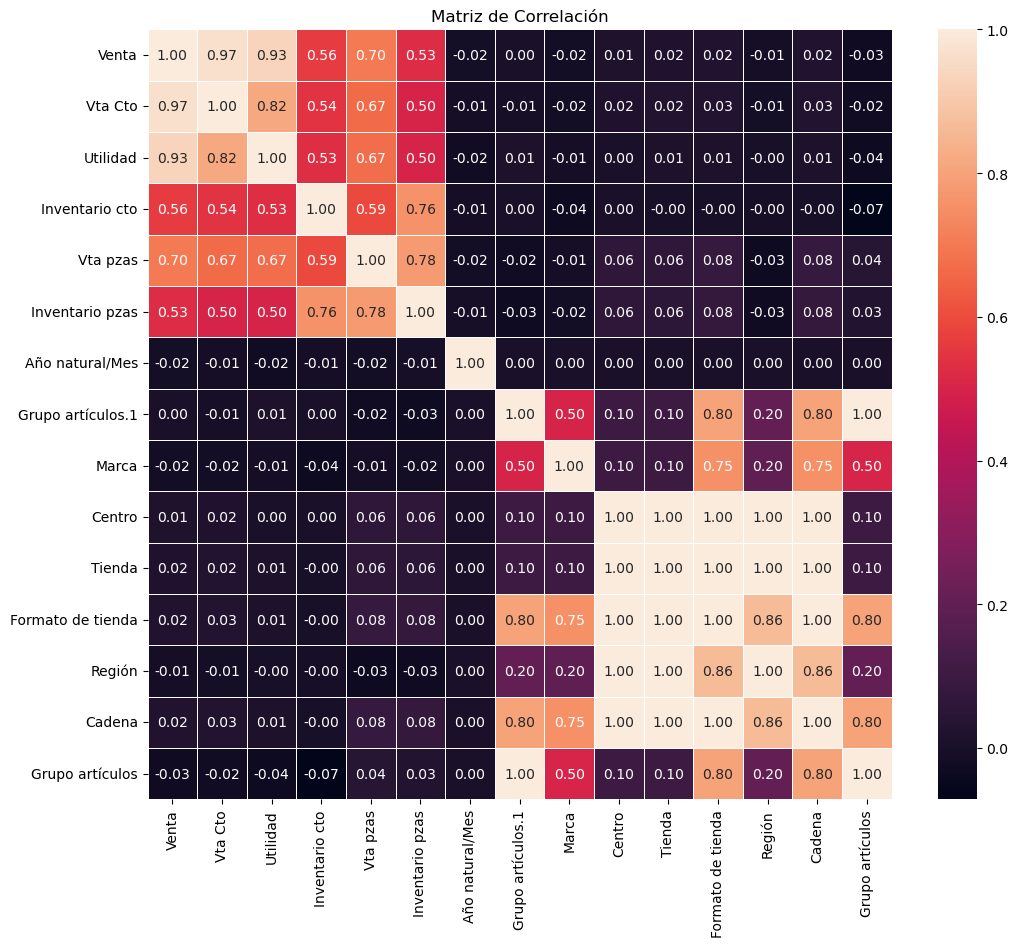

In [12]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Se puede observar que en las categóricas hay un relación de 1, por ejemplo, Centro tiene relación de 1 con Tienda, Formato de tienda, Región y Cadena. Entonces utilizando esto se podría quitar las demás variables y solo dejar Tienda, ya que esa información no nos podría importar más información. También hay una relación perfecto entre Grupo artículos.1 y Grupo artículos.

También hay mucha relación entre la variable Forma de tienda con Marca y Grupo artículos, y entre las variables Venta y Vta Cto, teniendo una correlación muy cercana a 1, y también con utilidad.

In [13]:
df_clean = df_all.drop(['Centro', 'Formato de tienda','Región','Cadena','Grupo artículos'], axis=1)

Entonces al final de tener 17 columnas pasamos a tener 10 columnas. Esto ayuda a tener menos datos que analizar y los datos que quitamos no aportan mucho o practicamente no aportan nada

In [14]:
df_clean.describe(include='all')

,Año natural/Mes,Grupo artículos.1,Marca,Tienda,Venta,Vta Cto,Utilidad,Inventario cto,Vta pzas,Inventario pzas
count,124752,124752,124752,124752,124752.000000,124752.000000,124752.000000,124752.000000,124752.000000,124752.000000
unique,12,229,151,86,NaN,NaN,NaN,NaN,NaN,NaN
top,ENE 2023,RIFLE,COLEMAN,La Marina San Fernando,NaN,NaN,NaN,NaN,NaN,NaN
freq,10396,6492,9732,9372,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,318.499417,187.938546,130.560871,970.846204,0.311290,1.432554
std,NaN,NaN,NaN,NaN,2008.416607,1243.177218,861.306385,3755.553690,2.379478,8.480591
min,NaN,NaN,NaN,NaN,-29322.930000,-16983.600000,-26259.320000,-6033.880000,-6.000000,-5.000000
25%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,344.700000,0.000000,1.000000


Se puede notar que la diferencia 75% a max para las variables "Venta", "Vta Cto", "Utilidad", "Inventario cto", "Vta pzas" y "Inventario pzas" es muy grande, esto se debe a la cantidad de 0's que hay.

## Análisis de cuáles productos no se están vendiendo, que tenga venta de piezas igual a 0

### Agrupamos por variable

In [20]:
# Filtramos datos donde "Vta pzas" es 0
zero_sales_data = df_clean[(df_clean['Vta pzas'] == 0) & (df['Inventario pzas'] > 0)]

# Agrupar por Marca 
group_by_brand = zero_sales_data.groupby('Marca').size().reset_index(name='Count')
group_by_brand_sorted = group_by_brand.sort_values(by='Count', ascending=False).head(5)

# Agrupar por Tienda
group_by_centro = zero_sales_data.groupby('Tienda').size().reset_index(name='Count')
group_by_centro_sorted = group_by_centro.sort_values(by='Count', ascending=False).head(5)

# Agrupar por Grupo artículos.1
group_by_product_group_1 = zero_sales_data.groupby('Grupo artículos.1').size().reset_index(name='Count')
group_by_product_group_1_sorted = group_by_product_group_1.sort_values(by='Count', ascending=False).head(5)

# Agrupar por Año natural/Mes
group_by_time = zero_sales_data.groupby('Año natural/Mes').size().reset_index(name='Count')
group_by_time_sorted = group_by_time.sort_values(by='Count', ascending=False).head(5)

# resultados
print("Top 5 por Marca:\n", group_by_brand_sorted.to_string(index=False))
print("\nTop 5 por Tienda:\n", group_by_centro_sorted.to_string(index=False))
print("\nTop 5 por Grupo artículos.1:\n", group_by_product_group_1_sorted.to_string(index=False))
print("\nTop 5 por Año natural/Mes:\n", group_by_time_sorted.to_string(index=False))


Top 5 por Marca:
    Marca  Count
 COLEMAN   3341
 CROSMAN   2346
 MENDOZA   2317
 HEXAGON   2221
MERCURIO   2175

Top 5 por Tienda:
                 Tienda  Count
   La Marina La Piedad   1703
  La Marina Guanajuato   1430
      La Marina Madero   1383
    La Marina Zapotlán   1242
La Marina San Fernando   1091

Top 5 por Grupo artículos.1:
    Grupo artículos.1  Count
             PISTOLA   2438
               RIFLE   2232
ACCESORIOS PARA CAZA   2216
 DIABOLOS MUNICIONES   1777
       BICI MONT R29   1750

Top 5 por Año natural/Mes:
 Año natural/Mes  Count
       FEB 2023   2822
       ENE 2023   2804
       MAR 2023   2684
       SEP 2023   2590
       AGO 2023   2558


La marca Coleman encabeza la lista con 3341 ocurrencias de productos sin vender

Las tiendas La Marina La Piedad, y La Marina Guanajuato son las que presentan el mayor número de productos sin venta, con más de 1400 ocurrencias cada una. 

Los rifles, pistolas y accesorios para caza son los grupos de artículos con la mayor cantidad de productos que no se vendieron, con más de 2,000 ocurrencias cada uno. Esto podría indicar una baja demanda.

De enero a marzo 2023 muestran la mayor cantidad de productos sin venta, con más de 2,600 ocurrencias cada uno. Hubo una acumulación significativa de inventario sin movimiento.

### Agrupamos cada combinación de 2 variables

In [21]:
new_categorical_columns = df_clean.select_dtypes(include=['object']).columns.tolist() 

# Iterar sobre todas las combinaciones posibles de dos columnas categóricas
for col1, col2 in combinations(new_categorical_columns, 2):
    group_by_two = zero_sales_data.groupby([col1, col2]).size().reset_index(name='Count')
    group_by_two_sorted = group_by_two.sort_values(by='Count', ascending=False)
    print(f"\nTop 5 por {col1} y {col2}:\n", group_by_two_sorted.head(5).to_string(index=False))


Top 5 por Año natural/Mes y Grupo artículos.1:
 Año natural/Mes Grupo artículos.1  Count
       MAY 2023           PISTOLA    245
       ABR 2023           PISTOLA    229
       JUN 2023           PISTOLA    226
       MAY 2023             RIFLE    224
       JUN 2023             RIFLE    213

Top 5 por Año natural/Mes y Marca:
 Año natural/Mes   Marca  Count
       SEP 2023 COLEMAN    297
       DIC 2023 COLEMAN    296
       NOV 2023 COLEMAN    294
       AGO 2023 COLEMAN    292
       ENE 2023 COLEMAN    291

Top 5 por Año natural/Mes y Tienda:
 Año natural/Mes               Tienda  Count
       FEB 2023  La Marina La Piedad    178
       ENE 2023  La Marina La Piedad    166
       MAR 2023  La Marina La Piedad    158
       SEP 2023  La Marina La Piedad    152
       FEB 2023 La Marina Guanajuato    146

Top 5 por Grupo artículos.1 y Marca:
    Grupo artículos.1   Marca  Count
      CASCO CICLISMO HEXAGON    949
       BICI MONT R29     BDS    763
TERMOS PARA CAMPISMO COLEMAN    7

Los rifles tienen consistentemente el mayor número de ventas cero a lo largo de varios meses, con mayo de 2023 mostrando el pico más alto con 500 instancias.

La marca Coleman presenta el mayor número de ventas cero en diferentes meses, con agosto de 2023 liderando con 766 instancias.

La Marina Guanajuato y La Marina San Fernando son las tiendas con más ventas cero en varios meses, con septiembre de 2023 y octubre de 2023 teniendo los conteos más altos.

Ciertos grupos de productos como "MEDICINA DEL DEPORTE" con la marca LOB y "BICI. MONT.R27.5 C/S" con MERCURIO muestran conteos extremadamente altos de ventas cero (más de 1,000 cada uno).

El grupo "ACC. PARA DEPORTE EN" (presumiblemente accesorios para deportes) tiene las ventas cero más altas en varias tiendas como La Marina Guanajuato y La Marina San Fernando.

La marca NIKE tiene un número abrumador de ventas cero, particularmente en La Marina Guanajuato y La Marina La Piedad (más de 1,000 cada una).

### Agrupamos cada combinación de 3 variables

In [22]:
# Iterar sobre todas las combinaciones posibles de tres columnas categóricas
for col1, col2, col3 in combinations(new_categorical_columns, 3):
    group_by_two = zero_sales_data.groupby([col1, col2, col3]).size().reset_index(name='Count')    
    group_by_two_sorted = group_by_two.sort_values(by='Count', ascending=False)    
    print(f"\nAgrupado por {col1}, {col2} y {col3}:\n", group_by_two_sorted.head(5).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1 y Marca:
 Año natural/Mes  Grupo artículos.1   Marca  Count
       ENE 2023 BOMBAS PARA INFLAR   INTEX     84
       JUN 2023     CASCO CICLISMO HEXAGON     82
       ABR 2023     CASCO CICLISMO HEXAGON     82
       MAR 2023     CASCO CICLISMO HEXAGON     81
       MAY 2023     CASCO CICLISMO HEXAGON     81

Agrupado por Año natural/Mes, Grupo artículos.1 y Tienda:
 Año natural/Mes    Grupo artículos.1              Tienda  Count
       JUL 2023                GORRA La Marina La Piedad      8
       FEB 2023 ACC. PARA DEPORTE EN    La Marina Madero      7
       FEB 2023                GORRA La Marina La Piedad      7
       OCT 2023                GORRA  La Marina Zapotlán      7
       OCT 2023      MOCHILA ESCOLAR  La Marina Zapotlán      7

Agrupado por Año natural/Mes, Marca y Tienda:
 Año natural/Mes Marca              Tienda  Count
       FEB 2023  NIKE La Marina La Piedad     24
       ENE 2023  NIKE La Marina La Piedad     20
  

FEB 2023 y OCT 2023 muestran los mayores conteos de ventas cero para productos como "MEDICINA DEL DEPORTE" con la marca ACCU-CHECK y "BICI MONT R26" con las marcas BDS y VELOCI, cada una con 86 instancias.

El grupo "ACC. PARA DEPORTE EN" muestra los mayores números de ventas cero en tiendas como La Marina Guanajuato y La Marina San Fernando, particularmente en SEP 2023 y FEB 2023.

La marca NIKE tiene un número elevado de ventas cero en tiendas como La Marina San Fernando y La Marina Guanajuato, especialmente en NOV 2023 y DIC 2023, con hasta 96 instancias.

El grupo "NO UTILIZAR (GUANTES)" con la marca NIKE tiene un número muy alto de ventas cero en varias tiendas, como La Marina San Fernando y La Marina Madero, con hasta 72 instancias.

### Agrupamos cada combinación de 4 variables

In [23]:
# Iterar sobre todas las combinaciones posibles de cuatro columnas categóricas
for col1, col2, col3, col4 in combinations(new_categorical_columns, 4):
    group_by_two = zero_sales_data.groupby([col1, col2, col3, col4]).size().reset_index(name='Count')
    group_by_two_sorted = group_by_two.sort_values(by='Count', ascending=False)
    print(f"\nAgrupado por {col1}, {col2}, {col3} y {col4}:\n", group_by_two_sorted.head(5).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1, Marca y Tienda:
 Año natural/Mes    Grupo artículos.1       Marca               Tienda  Count
       ABR 2023 ACC. PARA DEPORTE EN ANTIFASHION La Marina Guanajuato      1
       MAR 2023 TERMOS PARA CAMPISMO     HEXAGON El Bodegón Zamora II      1
       MAR 2023 TERMOS PARA CAMPISMO         NYC     El Bodegón Ameca      1
       MAR 2023 TERMOS PARA CAMPISMO         NYC El Bodegón Ahualulco      1
       MAR 2023 TERMOS PARA CAMPISMO         NYC   El Bodegón Acatlán      1


El grupo "NO UTILIZAR (GUANTES)" bajo la marca NIKE muestra consistentemente ventas cero en varios meses en la tienda La Marina San Fernando. Cada instancia tiene 6 ocurrencias, cubriendo los meses de agosto 2023, noviembre 2023, febrero 2023, marzo 2023, y septiembre 2023.

## Análisis de cuáles productos sí están vendiendo 

### Agrupamos cada combinación de 1 variables

In [25]:
data_selling  = df_clean[df_clean['Vta pzas'] !=0]
grouped_by_mes = data_selling.groupby('Año natural/Mes')['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
grouped_by_group = data_selling.groupby('Grupo artículos.1')['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
grouped_by_marca = data_selling.groupby('Marca')['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
grouped_by_tienda = data_selling.groupby('Tienda')['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)

print("Top 5 por Marca:\n", grouped_by_marca.head(5).to_string(index=False))
print("\nTop 5 por Tienda:\n", grouped_by_tienda.head(5).to_string(index=False))
print("\nTop 5 por Grupo artículos.1:\n", grouped_by_group.head(5).to_string(index=False))
print("\nTop 5 por Año natural/Mes:\n", grouped_by_mes.head(5).to_string(index=False))

Top 5 por Marca:
   Marca  Vta pzas
NEW ERA    4732.0
 ADIDAS    4143.0
   PUMA    3589.0
   GAMO    2112.0
HEXAGON    1954.0

Top 5 por Tienda:
                 Tienda  Vta pzas
La Marina San Fernando    7996.0
    La Marina Zapotlán    5847.0
  La Marina Guanajuato    4200.0
      La Marina Madero    4108.0
   La Marina La Piedad    3419.0

Top 5 por Grupo artículos.1:
    Grupo artículos.1  Vta pzas
               GORRA    6518.0
 DIABOLOS MUNICIONES    3112.0
     MOCHILA ESCOLAR    2738.0
ACCESORIOS PARA CAZA    2496.0
         CALCETA CAB    2267.0

Top 5 por Año natural/Mes:
 Año natural/Mes  Vta pzas
       DIC 2023    4339.0
       ABR 2023    4183.0
       MAR 2023    3572.0
       ENE 2023    3487.0
       AGO 2023    3298.0


La marca NEW ERA encabeza la lista con 4,732 piezas vendidas, seguida por ADIDAS con 4,143 piezas.

La Marina San Fernando es la tienda con más ventas, con 7,996 piezas vendidas, seguida por La Marina Zapotlán con 5,847 piezas.

El grupo GORRA es el líder en ventas con 6,518 piezas vendidas, seguido de DIABOLOS MUNICIONES con 3,112 piezas y estos son particularmente populares entre los consumidores

Diciembre 2023 lidera con 4,339 piezas vendidas lo que podría estar relacionado con navidad

### Agrupamos cada combinación de 2 variables

In [16]:
combinations_of_two = list(combinations(new_categorical_columns, 2))
for comb in combinations_of_two:
    grouped_combination = data_selling.groupby(list(comb))['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
    print(f"\nAgrupado por {comb[0]} y {comb[1]}:\n", grouped_combination.head(5).to_string(index=False))



Agrupado por Año natural/Mes y Grupo artículos.1:
 Año natural/Mes Grupo artículos.1  Vta pzas
       DIC 2023             GORRA    1201.0
       AGO 2023   MOCHILA ESCOLAR    1002.0
       ABR 2023             GORRA     635.0
       NOV 2023             GORRA     634.0
       JUN 2023             GORRA     578.0

Agrupado por Año natural/Mes y Marca:
 Año natural/Mes   Marca  Vta pzas
       DIC 2023 NEW ERA     899.0
       AGO 2023    PUMA     677.0
       DIC 2023    PUMA     655.0
       ABR 2023   INTEX     542.0
       ABR 2023 NEW ERA     482.0

Agrupado por Año natural/Mes y Tienda:
 Año natural/Mes                 Tienda  Vta pzas
       DIC 2023 La Marina San Fernando    1185.0
       DIC 2023     La Marina Zapotlán     777.0
       ABR 2023 La Marina San Fernando     768.0
       AGO 2023 La Marina San Fernando     753.0
       MAR 2023 La Marina San Fernando     666.0

Agrupado por Grupo artículos.1 y Marca:
    Grupo artículos.1   Marca  Vta pzas
               GORRA NEW

Diciembre 2023 lidera con la venta de GORRA (1,201 piezas), seguido por MOCHILA ESCOLAR en Agosto 2023 con 1,002 piezas.

NEW ERA en Diciembre 2023 es la marca más vendida con 899 piezas, seguida por PUMA en Agosto 2023 y Diciembre 2023.

La Marina San Fernando en Diciembre 2023 tiene las mayores ventas con 1,185 piezas, seguida por La Marina Zapotlán en el mismo mes con 777 piezas.

GORRA bajo la marca NEW ERA es el producto más vendido, con 4,598 piezas, seguido por DIABOLOS MUNICIONES de la marca GAMO con 1,563 piezas.

GORRA es el artículo más vendido en La Marina San Fernando con 1,962 piezas, seguido por la misma categoría en La Marina Zapotlán con 1,453 piezas.

NEW ERA en La Marina San Fernando lidera las ventas con 1,363 piezas, seguida de cerca por ADIDAS en la misma tienda con 1,357 piezas.

### Agrupamos cada combinación de 3 variables

In [17]:
combinations_of_three = list(combinations(new_categorical_columns, 3))
for comb in combinations_of_three:
    grouped_combination = data_selling.groupby(list(comb))['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]} y {comb[2]}:\n", grouped_combination.head(5).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1 y Marca:
 Año natural/Mes Grupo artículos.1   Marca  Vta pzas
       DIC 2023             GORRA NEW ERA     827.0
       ABR 2023             GORRA NEW ERA     476.0
       NOV 2023             GORRA NEW ERA     467.0
       ABR 2023           ALBERCA   INTEX     454.0
       JUN 2023             GORRA NEW ERA     411.0

Agrupado por Año natural/Mes, Grupo artículos.1 y Tienda:
 Año natural/Mes Grupo artículos.1                 Tienda  Vta pzas
       DIC 2023             GORRA La Marina San Fernando     400.0
       DIC 2023             GORRA     La Marina Zapotlán     311.0
       AGO 2023   MOCHILA ESCOLAR La Marina San Fernando     208.0
       JUN 2023             GORRA La Marina San Fernando     202.0
       DIC 2023             GORRA       La Marina Madero     195.0

Agrupado por Año natural/Mes, Marca y Tienda:
 Año natural/Mes   Marca                 Tienda  Vta pzas
       DIC 2023 NEW ERA La Marina San Fernando     276.0
     

Diciembre 2023 lidera con la venta de GORRA de la marca NEW ERA (827 piezas), seguido por Abril 2023 con la misma combinación (476 piezas).

GORRA en La Marina San Fernando en Diciembre 2023 tiene las mayores ventas con 400 piezas, seguida por la misma categoría en La Marina Zapotlán (311 piezas).

NEW ERA en La Marina San Fernando en Diciembre 2023 lidera las ventas con 276 piezas, seguido por PUMA en la misma tienda durante el mismo mes (245 piezas).

GORRA de la marca NEW ERA en La Marina San Fernando lidera las ventas con 1,320 piezas, seguida por la misma combinación en La Marina Zapotlán (1,061 piezas).

### Agrupamos cada combinación de 4 variables

In [18]:
combinations_of_four = list(combinations(new_categorical_columns, 4))
for comb in combinations_of_four:
    grouped_combination = data_selling.groupby(list(comb))['Vta pzas'].sum().reset_index().sort_values(by='Vta pzas', ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]} y {comb[2]} y {comb[3]}:\n", grouped_combination.head(5).to_string(index=False))



Agrupado por Año natural/Mes, Grupo artículos.1 y Marca y Tienda:
 Año natural/Mes Grupo artículos.1   Marca                 Tienda  Vta pzas
       DIC 2023             GORRA NEW ERA La Marina San Fernando     252.0
       DIC 2023             GORRA NEW ERA     La Marina Zapotlán     224.0
       DIC 2023             GORRA NEW ERA   La Marina Guanajuato     150.0
       JUN 2023             GORRA NEW ERA La Marina San Fernando     139.0
       ABR 2023             GORRA NEW ERA La Marina San Fernando     135.0


Diciembre 2023 tiene las mayores ventas para la GORRA de NEW ERA en La Marina San Fernando con 252 piezas, seguido por La Marina Zapotlán con 224 piezas y La Marina Guanajuato con 150 piezas, lo que indica una fuerte estacionalidad probablemente impulsada por las compras navideñas.

## Ahora vamos a checar las utilidades

### Agrupamos cada combinación de 1 variables para ver cuales productos tienen mayor y menor utilidad

#### Mayor Utilidad

In [28]:
data_earning = df_clean[df_clean['Utilidad'] != 0]

grouped_by_mes_util = data_earning.groupby('Año natural/Mes')['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
grouped_by_group_util = data_earning.groupby('Grupo artículos.1')['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
grouped_by_marca_util = data_earning.groupby('Marca')['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
grouped_by_tienda_util = data_earning.groupby('Tienda')['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)

print("--TOP MAYOR UTILIDAD--\n")
print("Mayor utilidad por Marca:\n", grouped_by_marca_util.head(5).to_string(index=False))
print("\nMayor utilidad por Tienda:\n", grouped_by_tienda_util.head(5).to_string(index=False))
print("\nMayor utilidad por Grupo artículos.1:\n", grouped_by_group_util.head(5).to_string(index=False))
print("\nMayor utilidad por Año natural/Mes:\n", grouped_by_mes_util.head(5).to_string(index=False))

--TOP MAYOR UTILIDAD--

Mayor utilidad por Marca:
    Marca   Utilidad
MERCURIO 2822463.97
    GAMO 1787734.48
 MENDOZA 1293677.96
 NEW ERA 1183602.78
     BDS 1067302.65

Mayor utilidad por Tienda:
                 Tienda   Utilidad
La Marina San Fernando 1867816.46
    La Marina Zapotlán 1515315.77
      La Marina Madero  974615.84
  La Marina Guanajuato  941033.81
   La Marina La Piedad  933292.04

Mayor utilidad por Grupo artículos.1:
 Grupo artículos.1   Utilidad
            RIFLE 3120474.12
    BICI MONT R29 2502594.24
            GORRA 1479295.77
    BICI MONT R26 1188314.67
          PISTOLA 1133313.92

Mayor utilidad por Año natural/Mes:
 Año natural/Mes   Utilidad
       DIC 2023 1933336.62
       MAR 2023 1851015.08
       ABR 2023 1740989.46
       ENE 2023 1667740.53
       FEB 2023 1452300.93


Diciembre 2023 es el mes con la mayor utilidad generada, alcanzando 1,933,336.62 unidades monetarias, seguido por Marzo 2023 con 1,851,015.08

El grupo RIFLE encabeza la lista con una utilidad de 3,120,474.12unidades monetarias, seguido por BICI MONT R29 con 2,502,594.24

La marca MERCURIO lidera en términos de utilidad generada, alcanzando 2,822,463.97 unidades monetarias, seguida por GAMO con 1,787,734.48

La Marina San Fernando es la tienda que más utilidad genera, con 1,867,816.46 unidades monetarias, seguida por La Marina Zapotlán con 1,515,315.77

Productos de alto valor como rifles y bicicletas, así como marcas relacionadas con actividades al aire libre, están entre los más rentables. Las tiendas La Marina San Fernando y La Marina Zapotlán emergen como líderes en generación de utilidades

#### Menor Utilidad

In [27]:
#### Mayor Utilidadprint("--TOP MENOR UTILIDAD--\n")
print("Menor utilidad por Marca:\n", grouped_by_marca_util.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))
print("\nMenor utilidad por Tienda:\n", grouped_by_tienda_util.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))
print("\nMenor utilidad por Grupo artículos.1:\n", grouped_by_group_util.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))
print("\nMenor utilidad por Año natural/Mes:\n", grouped_by_mes_util.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))

Menor utilidad por Marca:
     Marca  Utilidad
  BELFORT -43296.81
   GARMIN -35834.09
SH ACTIVE -22011.58
    MUELA  -8481.18
FORNITURE  -3881.30

Menor utilidad por Tienda:
                         Tienda  Utilidad
      El Bodegón Manzanillo II  38694.92
        El Bodegón Teocaltiche  49704.06
         El Bodegón Colima III  55141.66
El Bodegón Villa de Alvarez II  56252.99
       El Bodegón Jalostotilán  60729.63

Menor utilidad por Grupo artículos.1:
    Grupo artículos.1  Utilidad
     BICI. RUTA R700 -34672.40
MONITORES DEPORTIVOS -34569.80
   SOPORTE RACK BICI  -1085.90
  BICICLETA PLEGABLE   -837.31
     MANILLA BEISBOL   -471.48

Menor utilidad por Año natural/Mes:
 Año natural/Mes   Utilidad
       SEP 2023  976701.28
       MAY 2023  996885.65
       OCT 2023 1007854.02
       JUL 2023 1062280.20
       JUN 2023 1104804.29


Septiembre 2023 es el mes con la menor utilidad positiva, generando 976,701.28 unidades monetarias, seguido de Mayo 2023 con 996,885.65.

BICI. RUTA R700 y MONITORES DEPORTIVOS son los grupos de artículos que generan las menores utilidades, con pérdidas de -34,672.40 y -34,569.80 unidades monetarias, respectivamente.

Las marcas BELFORT y GARMIN son las que generan las menores utilidades, con pérdidas de -43,296.81 y -35,834.09 unidades monetarias, respectivamente.

El Bodegón Manzanillo II es la tienda con la utilidad positiva más baja, con 38,694.92 unidades monetarias, seguida por El Bodegón Teocaltiche con 49,704.06.

Las bicicletas y productos tecnológicos, como monitores deportivos, junto con marcas como BELFORT y GARMIN, están generando pérdidas

### Agrupamos cada combinación de 2 variables para ver cuales productos tienen mayor y menor utilidad

#### Mayor Utilidad

In [21]:
combinations_of_two = list(combinations(new_categorical_columns, 2))
for comb in combinations_of_two:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
    print(f"\nAgrupado por {comb[0]} y {comb[1]}:\n", grouped_combination.head(5).to_string(index=False))


Agrupado por Año natural/Mes y Grupo artículos.1:
 Año natural/Mes Grupo artículos.1  Utilidad
       MAR 2023           ALBERCA 429194.69
       ABR 2023           ALBERCA 381140.48
       ENE 2023             RIFLE 380189.52
       NOV 2023             RIFLE 362604.72
       DIC 2023             RIFLE 353917.04

Agrupado por Año natural/Mes y Marca:
 Año natural/Mes    Marca  Utilidad
       MAR 2023    INTEX 431110.20
       DIC 2023 MERCURIO 405337.41
       ENE 2023 MERCURIO 389536.52
       ABR 2023    INTEX 388965.61
       MAR 2023 MERCURIO 262542.13

Agrupado por Año natural/Mes y Tienda:
 Año natural/Mes                 Tienda  Utilidad
       DIC 2023 La Marina San Fernando 312284.43
       DIC 2023     La Marina Zapotlán 205296.50
       MAR 2023 La Marina San Fernando 167017.29
       ABR 2023 La Marina San Fernando 166793.71
       FEB 2023     La Marina Zapotlán 158442.14

Agrupado por Grupo artículos.1 y Marca:
 Grupo artículos.1    Marca   Utilidad
            RIFLE  

Marzo 2023 lidera con la mayor utilidad en el grupo de ALBERCA (piscinas) con 429,194.69 unidades monetarias, seguido de Abril 2023 con 381,140.48 para el mismo grupo.

Marzo 2023 y Abril 2023 son meses exitosos para la marca INTEX con utilidades superiores a 400,000 unidades monetarias.

La Marina San Fernando genera la mayor utilidad en Diciembre 2023 con 312,284.43 unidades monetarias, seguida por La Marina Zapotlán con 205,296.50.

RIFLES de la marca GAMO generan la mayor utilidad con 1,485,177.22 unidades monetarias.
BICI MONT R29 de la marca MERCURIO también es altamente rentable, con más de 1,200,000 unidades monetarias en utilidad.

GORRA en La Marina San Fernando es extremadamente rentable, generando 427,582.19 unidades monetarias.

NEW ERA en La Marina San Fernando lidera las utilidades, generando 331,522.97 unidades monetaria

#### Menor Utilidad

In [22]:
for comb in combinations_of_two:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
    print(f"\nAgrupado por {comb[0]} y {comb[1]}:\n", grouped_combination.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))


Agrupado por Año natural/Mes y Grupo artículos.1:
 Año natural/Mes    Grupo artículos.1  Utilidad
       MAY 2023 BICI. MONT.R27.5 C/S -47170.93
       MAY 2023      BICI. RUTA R700 -40191.58
       MAY 2023 MONITORES DEPORTIVOS -28201.67
       MAY 2023  CASA DE CAMPAÑA 1-4 -28053.24
       MAY 2023       TOLDO O CARPAS -11961.15

Agrupado por Año natural/Mes y Marca:
 Año natural/Mes     Marca  Utilidad
       ABR 2023   BELFORT -47803.63
       MAY 2023    GARMIN -28201.67
       FEB 2023 SH ACTIVE -10625.76
       JUL 2023   BENOTTO  -9496.77
       SEP 2023    GARMIN  -8826.66

Agrupado por Año natural/Mes y Tienda:
 Año natural/Mes                     Tienda  Utilidad
       MAY 2023       El Bodegón Guzmán II  -9686.01
       MAY 2023       El Bodegón Ahualulco  -9438.16
       MAY 2023      El Bodegón San Felipe  -5963.72
       MAY 2023 El Bodegón Lagos de Moreno  -5053.88
       MAY 2023        El Bodegón Colima I  -4596.28

Agrupado por Grupo artículos.1 y Marca:
    Grupo 

Marzo 2023 lidera con la menor utilidad en el grupo de MONT.R27.5 C/S con -47,170.93 unidades monetarias y BICI. RUTA R700 -40,191.58

Abril 2023 y Mayo 2023 son meses menos exitosos para la marca BELFORT y GARMIN con -47,803.63 y -28,201.67 respectivamente de unidades monetarias.

Mayo 2023 y el bodegón Guzman II y Bodegon Ahualulco es el mes menos existoso con el bodegon ya que super las pérdidas de -9,000.16 de utilidades

Las Bicicletas de la marca BELFORT y MERCURIO superan las pérdidas de -35,000 de utilidades

Monitores deportivos en la marina san fernando y guanajuato lideran la tabla con pérdidas de -20,602.85 y -13,086.02 de unidades monetarias

Las marcas BELFORT y GARMIN en la Marina Zapotlán tiene las perdidas más altas arriba de -20,000 de utilidades

### Agrupamos cada combinación de 3 variables para ver cuales productos tienen mayor y menor utilidad

#### Mayor Utilidad

In [23]:
combinations_of_three = list(combinations(new_categorical_columns, 3))
for comb in combinations_of_three:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad',
                                                                                                       ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]} y {comb[2]}:\n", grouped_combination.head(5).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1 y Marca:
 Año natural/Mes Grupo artículos.1    Marca  Utilidad
       MAR 2023           ALBERCA    INTEX 422997.44
       ABR 2023           ALBERCA    INTEX 380009.50
       DIC 2023             GORRA  NEW ERA 208400.77
       DIC 2023     BICI MONT R26 MERCURIO 203298.59
       ENE 2023             RIFLE     GAMO 177656.06

Agrupado por Año natural/Mes, Grupo artículos.1 y Tienda:
 Año natural/Mes Grupo artículos.1                 Tienda  Utilidad
       DIC 2023             GORRA La Marina San Fernando  83816.64
       DIC 2023             GORRA     La Marina Zapotlán  77334.75
       MAY 2023     BICI MONT R29     La Marina Zapotlán  64871.39
       JUN 2023             GORRA La Marina San Fernando  47789.37
       AGO 2023   MOCHILA ESCOLAR La Marina San Fernando  46180.89

Agrupado por Año natural/Mes, Marca y Tienda:
 Año natural/Mes    Marca                 Tienda  Utilidad
       DIC 2023  NEW ERA La Marina San Fernando  65608.

En marzo y abril de 2023, las albercas de la marca INTEX generaron una utilidad de 422,997.44 y 380,009.50 respectivamente

En diciembre de 2023, las gorras en la tienda La Marina San Fernando y Zapotlán generaron utilidades mayores de 70,000.

En diciembre de 2023, las marcas NEW ERA en la tienda La Marina San Fernando y Zapotlán generaron utilidades mayores de 65,000.

Las gorrar de NEW ERA en la tienda La Marina San Fernando y Zapotlán generaron utilidades mayores de 28,000.

#### Menor Utilidad

In [24]:
for comb in combinations_of_three:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad',
                                                                                                       ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]} y {comb[2]}:\n",
          grouped_combination.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1 y Marca:
 Año natural/Mes    Grupo artículos.1    Marca  Utilidad
       ABR 2023        BICI MONT R29  BELFORT -47803.63
       MAY 2023 BICI. MONT.R27.5 C/S      BDS -42677.99
       MAY 2023      BICI. RUTA R700 MERCURIO -40191.58
       MAY 2023  CASA DE CAMPAÑA 1-4  HEXAGON -29817.06
       MAY 2023 MONITORES DEPORTIVOS   GARMIN -28201.67

Agrupado por Año natural/Mes, Grupo artículos.1 y Tienda:
 Año natural/Mes    Grupo artículos.1                 Tienda  Utilidad
       MAY 2023 BICI. MONT.R27.5 C/S   El Bodegón Ahualulco -15510.81
       ABR 2023        BICI MONT R29   La Marina Guanajuato -13178.04
       MAY 2023 MONITORES DEPORTIVOS La Marina San Fernando -12605.18
       DIC 2023        BICI MONT R26      El Bodegón Acatic -12339.33
       MAY 2023      BICI. RUTA R700   El Bodegón Guzmán II -10568.68

Agrupado por Año natural/Mes, Marca y Tienda:
 Año natural/Mes   Marca                 Tienda  Utilidad
       ABR 2023 BELF

En abril y Mayo de 2023, las bicicletas de montaña de la marca BELFORT y BDS generaron una pérdida arriba de 42,000.00.

En abril y Mayo de 2023, las bicicletas de montaña tienda El Bodegón Ahualulco y Marina Guanajuato generaron una pérdida de 13,000.00.

En abril de 2023, la marca BELFORT en la tienda La Marina Zapotlán y Guanjuato generó una pérdida de 19,000.

Las bicicletas y los monitores de la marca BELFORT en la tienda La Marina Zapotlán y San Fernando generaron una pérdida arriba 19,000 de utilidades


### Agrupamos cada combinación de 4 variables para ver cuales productos tienen mayor y menor utilidad

#### Mayor Utilidad

In [25]:
combinations_of_four = list(combinations(new_categorical_columns, 4))
for comb in combinations_of_four:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]}, {comb[2]} y {comb[3]}:\n", grouped_combination.head(5).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1, Marca y Tienda:
 Año natural/Mes Grupo artículos.1    Marca                 Tienda  Utilidad
       DIC 2023             GORRA  NEW ERA     La Marina Zapotlán  61355.64
       DIC 2023             GORRA  NEW ERA La Marina San Fernando  60116.41
       MAY 2023     BICI MONT R29 ALU BIKE     La Marina Zapotlán  43819.32
       JUN 2023             GORRA  NEW ERA La Marina San Fernando  36999.39
       DIC 2023             GORRA  NEW ERA   La Marina Guanajuato  35725.45


Lo que más generó fue en diciembre las gorrar marca NEW ERA en la marina Zapotlán y San Fernando superando las utilidades de 60,000

#### Menor Utilidad

In [26]:
for comb in combinations_of_four:
    grouped_combination = data_earning.groupby(list(comb))['Utilidad'].sum().reset_index().sort_values(by='Utilidad', ascending=False)
    print(f"\nAgrupado por {comb[0]}, {comb[1]}, {comb[2]} y {comb[3]}:\n", grouped_combination.reset_index(drop=True).tail(5).sort_index(ascending=False).to_string(index=False))


Agrupado por Año natural/Mes, Grupo artículos.1, Marca y Tienda:
 Año natural/Mes    Grupo artículos.1    Marca                 Tienda  Utilidad
       ABR 2023        BICI MONT R29  BELFORT     La Marina Zapotlán -26259.32
       ABR 2023        BICI MONT R29  BELFORT   La Marina Guanajuato -19710.81
       MAY 2023 BICI. MONT.R27.5 C/S      BDS   El Bodegón Ahualulco -15510.81
       MAY 2023 MONITORES DEPORTIVOS   GARMIN La Marina San Fernando -12605.18
       DIC 2023        BICI MONT R26 MERCURIO      El Bodegón Acatic -12339.33


Lo que más generó perdidas fue en el mes de Abril 2023 la bici de montaña de la marca BELFORD en la marina Zapotlán y Guanajuato haciendo que la suma de las pérdidas llegua a más de 40,000

## PARTE 2

In [36]:
# Cargamos la segunda sheet para obtener los datos
BASE_2 = pd.read_excel('PROYECTO 1 - DATA SCIENCE.xlsx', sheet_name=2)

In [37]:
BASE_2

,Año natural/Mes,Dep,Departamento,Grupo artículos,Venta,Vta Cto,Utilidad,Inv cto,Compras Cto,Vta pzas,Inv pzas,Compras Pzas
0,ENE 2021,42,ACC. DEPORTIVOS,BICI MONT R29,687860.09,369062.89,318797.20,1235760.67,893771.25,117,405,276.0
1,FEB 2021,42,ACC. DEPORTIVOS,BICI MONT R29,692375.17,376482.29,315892.88,1355384.55,498307.08,116,427,140.0
2,MAR 2021,42,ACC. DEPORTIVOS,BICI MONT R29,723262.52,394331.05,328931.47,1242078.30,292950.80,123,389,89.0
3,ABR 2021,42,ACC. DEPORTIVOS,BICI MONT R29,876936.90,486803.29,390133.61,1114531.24,374420.88,145,354,114.0
4,MAY 2021,42,ACC. DEPORTIVOS,BICI MONT R29,770025.85,442788.01,327237.84,1235638.22,580862.32,127,396,175.0
5,JUN 2021,42,ACC. DEPORTIVOS,BICI MONT R29,764184.79,422318.51,341866.28,1020725.12,214285.73,125,325,57.0
6,JUL 2021,42,ACC. DEPORTIVOS,BICI MONT R29,615438.66,344193.70,271244.96,1004032.10,325749.98,100,325,99.0
7,AGO 2021,42,ACC. DEPORTIVOS,BICI MONT R29,516979.05,296734.06,220244.99,733863.53,0.00,93,239,0.0
8,SEP 2021,42,ACC. DEPORTIVOS,BICI MONT R29,303413.74,163522.77,139890.97,571398.45,0.00,52,187,0.0
9,OCT 2021,42,ACC. DEPORTIVOS,BICI MONT R29,304904.29,176734.33,128169.96,602130.50,214600.40,48,155,18.0


Aquí podemos eliminar varias columnas que no nos proporcionan más información. Las cuáles son "Dep", "Departamento", "Grupo Artículos" 

In [38]:
BASE_2_aux = BASE_2.drop(['Departamento', 'Dep','Grupo artículos'], axis=1).fillna(0)
BASE_2_aux['Año natural/Mes'] = pd.date_range(start='2021-01-01', end='2023-12-01', freq='MS').strftime("%b %Y").tolist()

In [39]:
categorical_columns_1 = []
numerical_columns_1 = BASE_2_aux.select_dtypes(include=['number']).columns.tolist()

corr_matrix = pd.DataFrame(np.zeros((len(numerical_columns_1) + len(categorical_columns_1), 
                                     len(numerical_columns_1) + len(categorical_columns_1))),
                           index=numerical_columns_1 + categorical_columns_1,
                           columns=numerical_columns_1 + categorical_columns_1)

for col1 in numerical_columns_1:
    for col2 in numerical_columns_1:
        corr_matrix.loc[col1, col2] = BASE_2_aux[col1].corr(BASE_2_aux[col2])


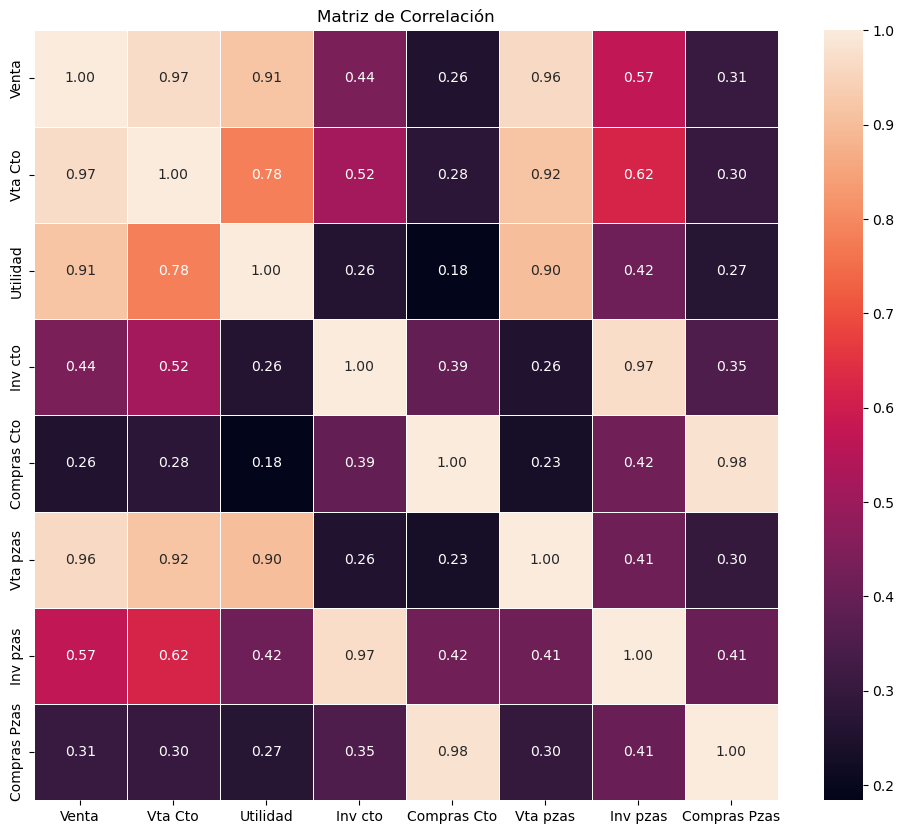

In [40]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlación')
plt.show()

Las que están muy relacionadas son:Compras Cto y Compras Pzas, Inv cto y Inv pza, Vta Cto y Vta Pza, Venta y Vta pzas y Ventas y Utilidad

In [41]:
BASE_2_aux.describe()

,Venta,Vta Cto,Utilidad,Inv cto,Compras Cto,Vta pzas,Inv pzas,Compras Pzas
count,36.000000,36.000000,36.000000,3.600000e+01,3.600000e+01,36.000000,36.000000,36.000000
mean,572307.040833,338931.409444,233375.631389,2.008455e+06,4.253368e+05,86.000000,489.916667,104.555556
std,200111.619363,130136.861861,81178.555713,9.446992e+05,4.231847e+05,33.606122,214.614255,112.637838
min,158740.840000,90031.510000,68709.330000,5.209155e+05,0.000000e+00,24.000000,133.000000,0.000000
25%,423139.410000,251914.005000,176824.412500,1.212763e+06,1.708914e+05,60.500000,340.000000,17.750000
50%,604803.440000,355850.615000,234198.065000,2.071322e+06,3.432434e+05,86.500000,439.500000,89.000000
75%,700097.007500,387347.372500,300968.720000,2.788854e+06,5.298370e+05,113.750000,678.000000,143.250000
max,937857.880000,621175.120000,390133.610000,3.543589e+06,1.826552e+06,155.000000,849.000000,467.000000


Los cuartiles indican que no hay outlayers en estos datos

In [42]:
BASE_2_aux['Fecha'] = pd.to_datetime(BASE_2_aux['Año natural/Mes'])
BASE_2_aux.set_index('Fecha', inplace=True)

C:\Users\Dekel Black\AppData\Local\Temp\ipykernel_24024\4271921631.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  BASE_2_aux['Fecha'] = pd.to_datetime(BASE_2_aux['Año natural/Mes'])


C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


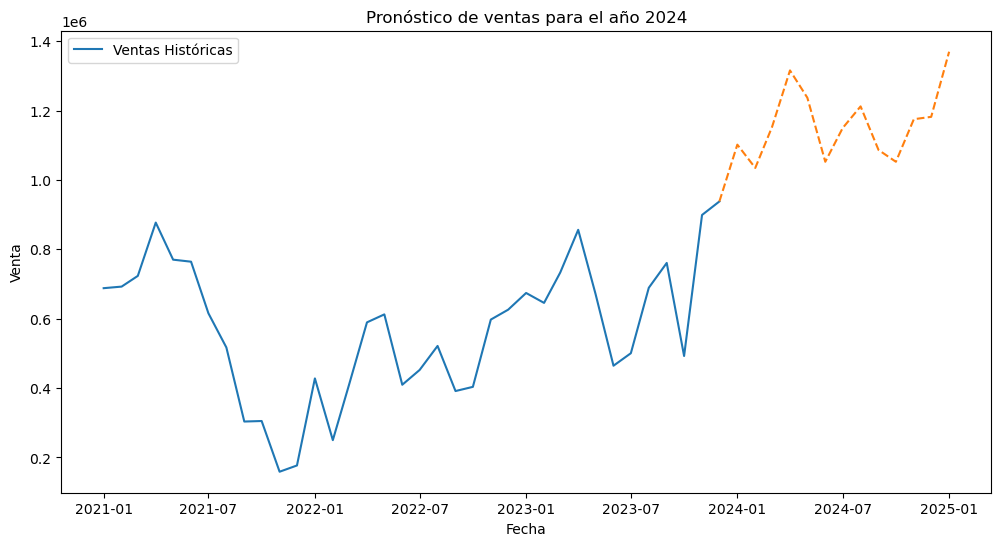

In [51]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(BASE_2_aux['Venta'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

forecast = fit_model.forecast(steps=13)

plt.figure(figsize=(12, 6))
plt.plot(BASE_2_aux['Venta'], label='Ventas Históricas')
plt.plot(pd.concat([BASE_2_aux['Venta'][-1:], forecast]), linestyle='--') 
plt.title('Pronóstico de ventas para el año 2024')
plt.xlabel('Fecha')
plt.ylabel('Venta')
plt.legend()
#plt.grid(True)
plt.show()

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


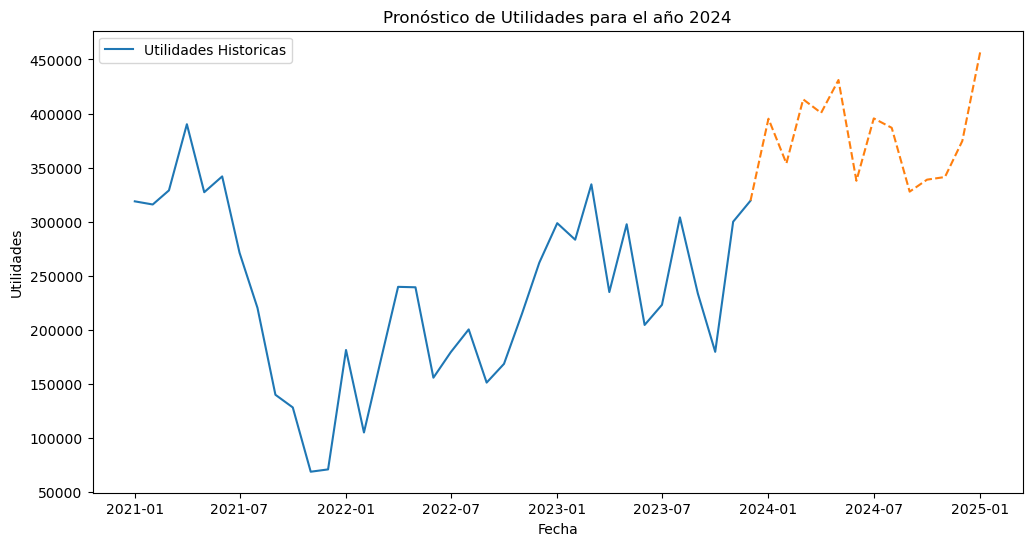

In [52]:
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model = ExponentialSmoothing(BASE_2_aux['Utilidad'], trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

forecast = fit_model.forecast(steps=13)

plt.figure(figsize=(12, 6))
plt.plot(BASE_2_aux['Utilidad'], label='Utilidades Historicas')
plt.plot(pd.concat([BASE_2_aux['Utilidad'][-1:], forecast]), linestyle='--') 
plt.title('Pronóstico de Utilidades para el año 2024')
plt.xlabel('Fecha')
plt.ylabel('Utilidades')
plt.legend()
plt.show()

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


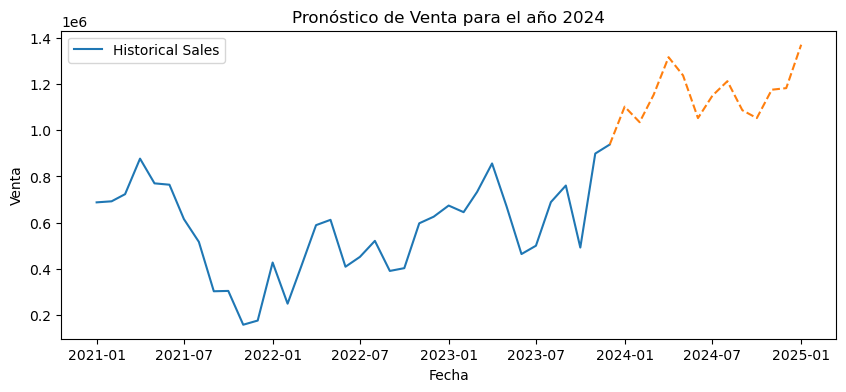

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


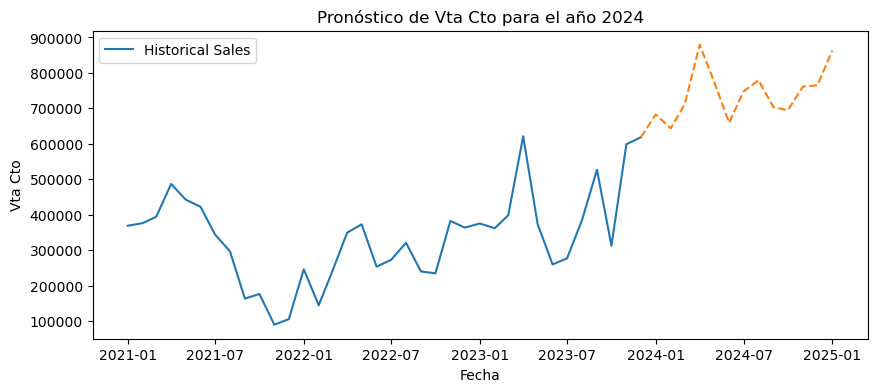

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


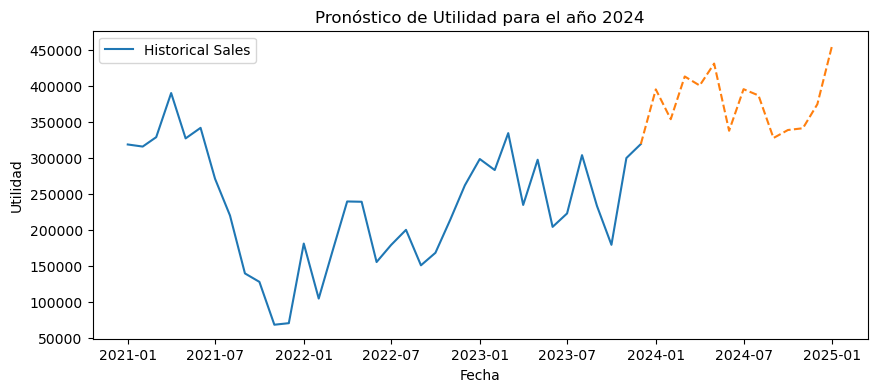

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


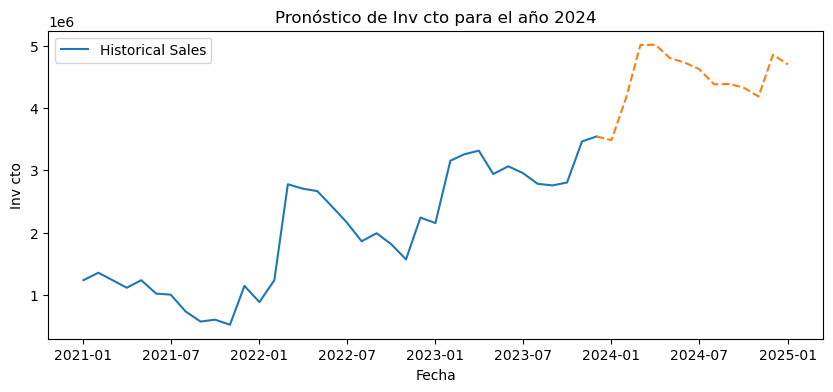

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


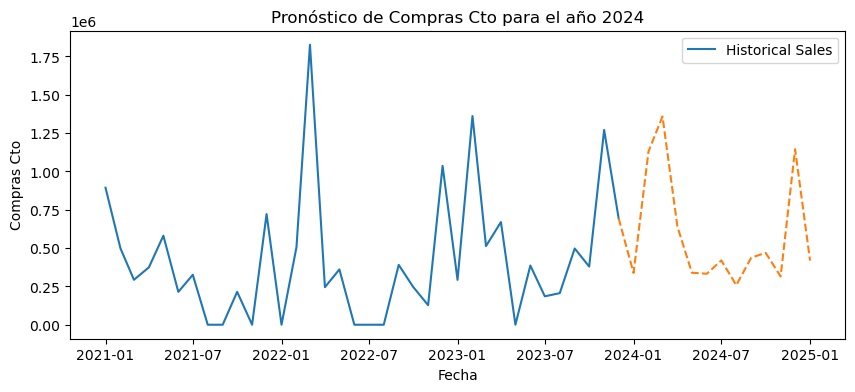

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


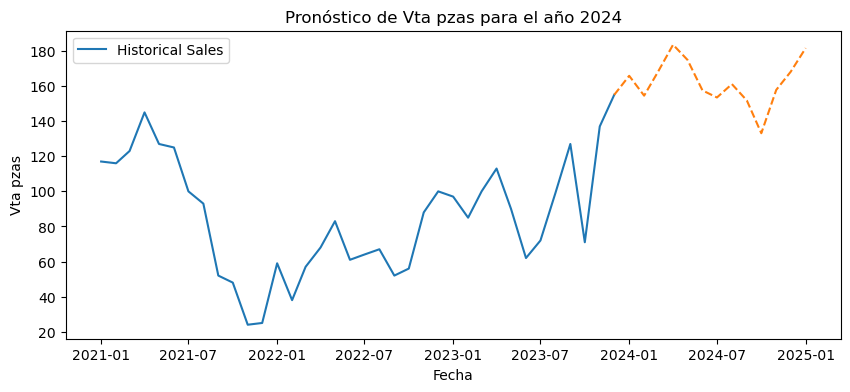

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


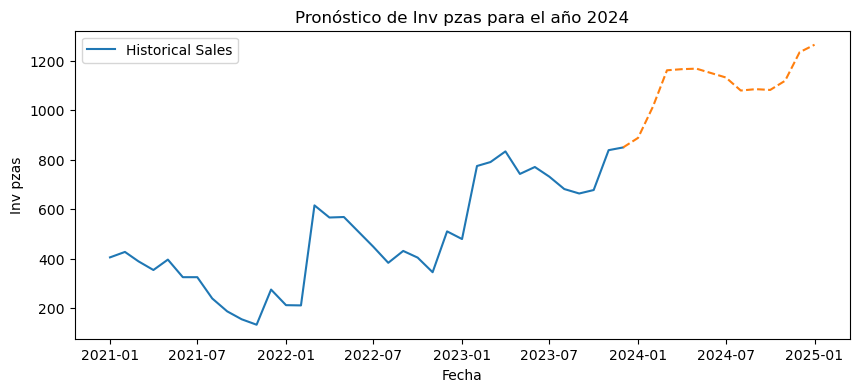

C:\Users\Dekel Black\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


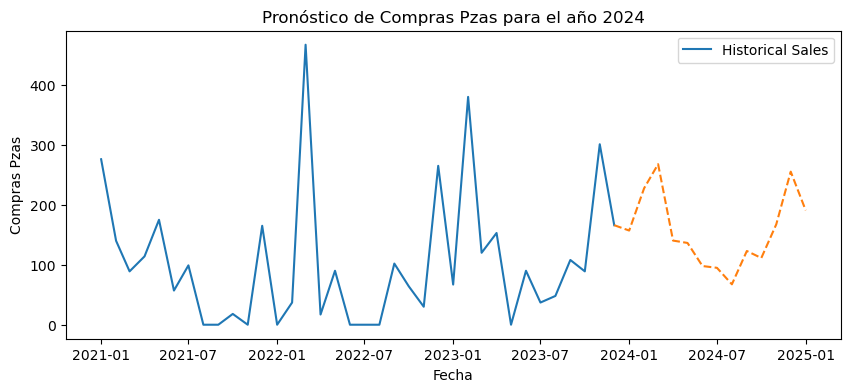

In [57]:
for i in BASE_2_aux.columns[1:]:
    model = ExponentialSmoothing(BASE_2_aux[i], trend='add', seasonal='add', seasonal_periods=12)
    fit_model = model.fit()

    forecast = fit_model.forecast(steps=13)

    plt.figure(figsize=(10, 4))
    plt.plot(BASE_2_aux[i], label='Historical Sales')
    plt.plot(pd.concat([BASE_2_aux[i][-1:], forecast]), linestyle='--') 
    plt.title(f'Pronóstico de {i} para el año 2024')
    plt.xlabel('Fecha')
    plt.ylabel(f'{i}')
    plt.legend()
    plt.show()